In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors

In [126]:
path = '/home/nogaschw/Call-to-order/Data2/base_data.csv'
df = pd.read_csv(path, index_col=0)
df.head(3)

,committee_id,committee_name,session_id,format,chairperson,text_id,speaker_name,conversation,number of apperance,sign,call_to_order
0,0,ועדת הכנסת,78,1,רוני בר-און,0,רוני בר-און,"אני מתכבד לפתוח את ישיבת ועדת הכנסת, ישיבה מספ...",3,:,0
1,0,ועדת הכנסת,78,1,רוני בר-און,1,היועץ המשפטי לממשלה מני מזוז,בישיבה הקודמת הבטחתי להתייחס בצורה יותר מדויקת...,2,:,0
2,0,ועדת הכנסת,78,1,רוני בר-און,2,רוני בר-און,נותרה שאלה ששאלתי בדיון האחרון – זה מתחבר לתוצ...,0,:,0


In [108]:
df_filter.T['יואב קיש'].T

,call_to_order,session_id,calls_per_session
committee_name,,,
ועדת הכנסת,128.0,13.0,9.846154
ועדת הפנים והגנת הסביבה,72.0,6.0,12.000000


In [133]:
df_filter = df[['chairperson', 'committee_name', 'call_to_order', 'session_id']]
df_filter = df_filter[df_filter['committee_name'] != 'מושב ראשון']
df_filter = df_filter[df_filter['call_to_order'] == 1]
df_filter = df_filter.groupby(['chairperson', 'committee_name']).agg({'call_to_order': 'sum', 'session_id': 'nunique'})
df_filter = df_filter[df_filter['session_id'] > 4]
df_filter['calls_per_session'] = df_filter['call_to_order'] / df_filter['session_id']
df_chair = df_filter.groupby('chairperson').agg({'call_to_order': 'sum', 'session_id': 'sum', 'calls_per_session': 'sum'})
df_chair.sort_values(by='calls_per_session', ascending=False, inplace=True)
names = df_chair.index[:8]
df_filter = df_filter.loc[names]
df_filter

call_to_order  \
chairperson     committee_name                                             
יואב קיש        ועדת הכנסת                                           128   
                ועדת הפנים והגנת הסביבה                               72   
שמחה רוטמן      ועדת החוקה חוק ומשפט                                1031   
יצחק פינדרוס    ועדת החוקה חוק ומשפט                                  80   
מכלוף מיקי זוהר הוועדה המיוחדת לצדק חלוקתי ולשוויון חברתי             10   
                ועדת הכנסת                                            34   
                ועדת הכספים                                           44   
אבי ניסנקורן    הוועדה המסדרת                                         38   
זבולון אורלב    הוועדה לזכויות הילד                                   26   
                הוועדה לענייני ביקורת המדינה                          32   
                ועדת החינוך התרבות והספורט                            38   
                ועדת החינוך והתרבות                                   19   
דוד אמסלם       ועדת הפנים והגנת הסביבה                              166   
יריב לוין       ועדת הכנסת                                            63   

                                                           session_id  \
chairperson     committee_name                                          
יואב קיש        ועדת הכנסת                                         13   
                ועדת הפנים והגנת הסביבה                             6   
שמחה רוטמן      ועדת החוקה חוק ומשפט                               60   
יצחק פינדרוס    ועדת החוקה חוק ומשפט                                5   
מכלוף מיקי זוהר הוועדה המיוחדת לצדק חלוקתי ולשוויון חברתי           6   
                ועדת הכנסת                                         12   
                ועדת הכספים                                        11   
אבי ניסנקורן    הוועדה המסדרת                                       5   
זבולון אורלב    הוועדה לזכויות הילד                                13   
                הוועדה לענייני ביקורת המדינה                       16   
                ועדת החינוך התרבות והספורט                         24   
                ועדת החינוך והתרבות                                13   
דוד אמסלם       ועדת הפנים והגנת הסביבה                            25   
יריב לוין       ועדת הכנסת                                         10   

                                                           calls_per_session  
chairperson     committee_name                                                
יואב קיש        ועדת הכנסת                                          9.846154  
                ועדת הפנים והגנת הסביבה                            12.000000  
שמחה רוטמן      ועדת החוקה חוק ומשפט                               17.183333  
יצחק פינדרוס    ועדת החוקה חוק ומשפט                               16.000000  
מכלוף מיקי זוהר הוועדה המיוחדת לצדק חלוקתי ולשוויון חברתי           1.666667  
                ועדת הכנסת                                          2.833333  
                ועדת הכספים                                         4.000000  
אבי ניסנקורן    הוועדה המסדרת                                       7.600000  
זבולון אורלב    הוועדה לזכויות הילד                                 2.000000  
                הוועדה לענייני ביקורת המדינה                        2.000000  
                ועדת החינוך התרבות והספורט                          1.583333  
                ועדת החינוך והתרבות                                 1.461538  
דוד אמסלם       ועדת הפנים והגנת הסביבה                             6.640000  
יריב לוין       ועדת הכנסת                                          6.300000

In [ ]:
names = list(df_chair.index[:8])
committees = list(df_filter.index.get_level_values(1).unique())
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown']
values_1 = [9.84, 

fig, ax = plt.subplots()
ax.bar(names, values_mz, label='מירב זוהר', color=colors[0])
ax.bar(names, values_yf, label='יעל פרס', bottom=values_mz, color=colors[1])
ax.bar(names, values_sr, label='שרית רם', bottom=np.add(values_mz, values_yf), color=colors[2])


plt.show()

In [163]:
committees

['ועדת הכנסת',
 'ועדת הפנים והגנת הסביבה',
 'ועדת החוקה חוק ומשפט',
 'הוועדה המיוחדת לצדק חלוקתי ולשוויון חברתי',
 'ועדת הכספים',
 'הוועדה המסדרת',
 'הוועדה לזכויות הילד',
 'הוועדה לענייני ביקורת המדינה',
 'ועדת החינוך התרבות והספורט',
 'ועדת החינוך והתרבות']

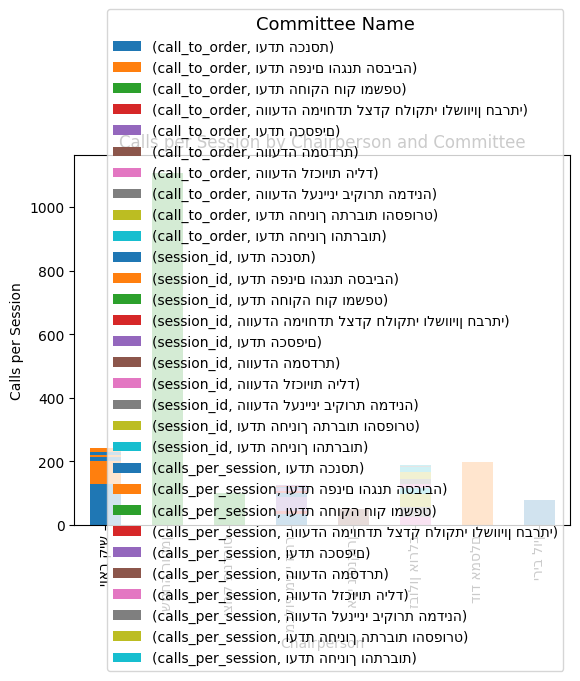

In [150]:
pivot_df = df_filter.unstack()
pivot_df.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Chairperson')
plt.ylabel('Calls per Session')
plt.title('Calls per Session by Chairperson and Committee')

# Adding legend
plt.legend(title='Committee Name', title_fontsize='13', fontsize='10', loc='right')

# Show plot
plt.show()

In [138]:
pivot_df

chairperson          יואב קיש                                   שמחה רוטמן  \
committee_name     ועדת הכנסת ועדת הפנים והגנת הסביבה ועדת החוקה חוק ומשפט   
call_to_order      128.000000                    72.0          1031.000000   
session_id          13.000000                     6.0            60.000000   
calls_per_session    9.846154                    12.0            17.183333   

chairperson               יצחק פינדרוס  \
committee_name    ועדת החוקה חוק ומשפט   
call_to_order                     80.0   
session_id                         5.0   
calls_per_session                 16.0   

chairperson                                 מכלוף מיקי זוהר             \
committee_name    הוועדה המיוחדת לצדק חלוקתי ולשוויון חברתי ועדת הכנסת   
call_to_order                                     10.000000  34.000000   
session_id                                         6.000000  12.000000   
calls_per_session                                  1.666667   2.833333   

chairperson                    אבי ניסנקורן        זבולון אורלב  \
committee_name    ועדת הכספים הוועדה המסדרת הוועדה לזכויות הילד   
call_to_order            44.0          38.0                26.0   
session_id               11.0           5.0                13.0   
calls_per_session         4.0           7.6                 2.0   

chairperson                                                                \
committee_name    הוועדה לענייני ביקורת המדינה ועדת החינוך התרבות והספורט   
call_to_order                             32.0                  38.000000   
session_id                                16.0                  24.000000   
calls_per_session                          2.0                   1.583333   

chairperson                                         דוד אמסלם  יריב לוין  
committee_name    ועדת החינוך והתרבות ועדת הפנים והגנת הסביבה ועדת הכנסת  
call_to_order               19.000000                  166.00       63.0  
session_id                  13.000000                   25.00       10.0  
calls_per_session            1.461538                    6.64        6.3

In [3]:
def plot_barcode(binary_sequences, titles=None, colors=['white', 'black'], width=10):
    num_sequences = len(binary_sequences)
    fig, ax = plt.subplots(num_sequences, 1, figsize=(width, num_sequences))

    if not titles:
        titles = [f"Sequence {i+1}" for i in range(num_sequences)]

    for i, (sequence, title) in enumerate(zip(binary_sequences, titles)):
        for j, bit in enumerate(sequence):
            color = colors[bit]
            ax[i].axvline(x=j, color=color, linewidth=2)
        ax[i].set_yticks([])
        ax[i].set_xticks([])
        ax[i].set_xlim(0, len(sequence))
        ax[i].set_ylim(-0.5, 0.5)  # Adjusted y-axis limits for each subplot
        ax[i].set_title(title)

    plt.tight_layout()
    plt.show()

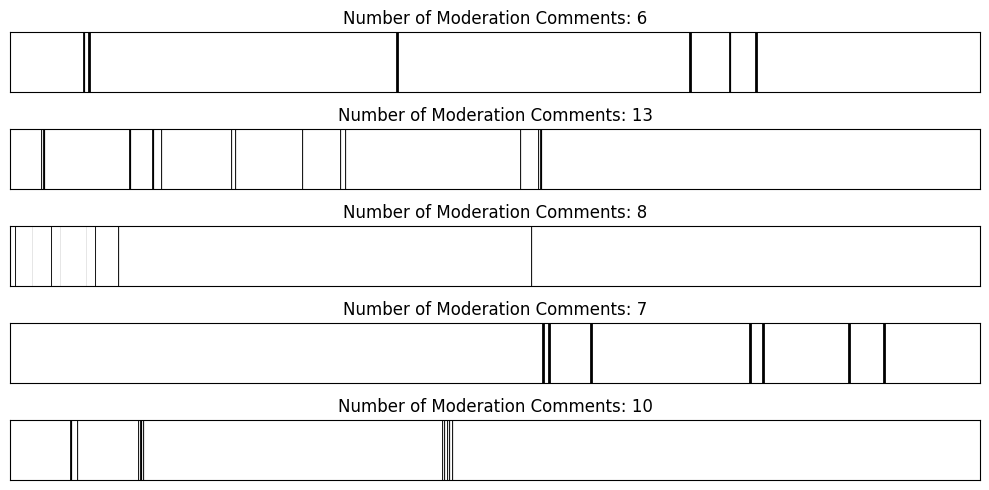

In [5]:
sessions = df['session_id'].unique()
skip = [3044, 4288]

six_sequences = []
ids = []
for session in sessions:
    if session in skip:
        continue
    binary_sequence = df[df['session_id'] == session]['call_to_order'].values
    if sum(binary_sequence) > 5:
        six_sequences.append(binary_sequence)
        ids.append(session)
    if len(six_sequences) == 5:
        break

titles = [f'Number of Moderation Comments: {sum(seq)}' for seq in six_sequences]
plot_barcode(six_sequences, titles=titles)

In [10]:
def average_distance_between_ones(binary_sequence):
    ones_indices = [i for i, bit in enumerate(binary_sequence) if bit == 1]
    num_ones = len(ones_indices)
    total_distance = 0
    pair_count = 0

    if num_ones < 2:
        return 0  # If there's only one or zero 1s, the distance is 0

    for i in range(num_ones - 1):
        for j in range(i + 1, num_ones):
            total_distance += ones_indices[j] - ones_indices[i]
            pair_count += 1

    if pair_count == 0:
        return 0  # Avoid division by zero
    else:
        return (total_distance / pair_count) / len(binary_sequence)


avg_distance = average_distance_between_ones(binary_sequence)
our_avg_distance = average_distance_between_ones(our_sequence)
print(f"Average distance between 1s: {avg_distance:.2f}")
print(f"Our average distance between 1s: {our_avg_distance:.2f}")

Average distance between 1s: 0.35
Our average distance between 1s: 0.20


In [11]:
def average_distance_to_closest_neighbor(binary_sequence):
    ones_indices = [i for i, bit in enumerate(binary_sequence) if bit == 1]
    num_ones = len(ones_indices)
    
    if num_ones < 2:
        return 0  # If there's only one or zero 1s, the distance is 0
    
    total_distance = 0
    for i in range(num_ones):
        if i == 0:
            distance = ones_indices[i+1] - ones_indices[i]
        elif i == num_ones - 1:
            distance = ones_indices[i] - ones_indices[i-1]
        else:
            distance = min(ones_indices[i] - ones_indices[i-1], ones_indices[i+1] - ones_indices[i])
        total_distance += distance
    
    sequence_length = len(binary_sequence)
    normalized_avg_distance = total_distance / sequence_length
    
    return normalized_avg_distance

# Example usage:
avg_distance = average_distance_to_closest_neighbor(binary_sequence)
our_avg_distance = average_distance_to_closest_neighbor(our_sequence)
print(f"Average distance to closest neighbor: {avg_distance:.2f}")
print(f"Our average distance to closest neighbor: {our_avg_distance:.2f}")

Average distance to closest neighbor: 0.67
Our average distance to closest neighbor: 0.03


In [13]:
def average_local_reachability_density(binary_sequence, k=5):
    ones_indices = [i for i, bit in enumerate(binary_sequence) if bit == 1]
    num_ones = len(ones_indices)
    
    if num_ones < 2:
        return 0  # If there's only one or zero 1s, the average LRD is 0
    
    X = np.array(ones_indices).reshape(-1, 1)  # Reshape to fit NearestNeighbors input format
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(X)
    distances, _ = nbrs.kneighbors(X)

    lrd_values = np.zeros(num_ones)
    for i in range(num_ones):
        lrd_values[i] = 1 / np.mean(distances[i, 1:])  # Exclude the distance to the point itself
    
    average_lrd = np.mean(lrd_values)
    return average_lrd

# Example usage:
avg_lrd = average_local_reachability_density(binary_sequence)
our_avg_lrd = average_local_reachability_density(our_sequence)
print(f"Average local reachability density: {avg_lrd:.2f}")
print(f"Our average local reachability density: {our_avg_lrd:.2f}")

Average local reachability density: 0.31
Our average local reachability density: 0.15


In [36]:
knesset_sessions_average_distances = []
knesset_sessions_closest_neighbor_distances = []
knesset_sessions_lrd_values = []

random_sessions_average_distances = []
random_sessions_closest_neighbor_distances = []
random_sessions_lrd_values = []

for session in tqdm(sessions):
    curr_knesset_sequence = df[df['session_id'] == session]['call_to_order'].values
    
    length = len(curr_knesset_sequence)
    num_ones = sum(curr_knesset_sequence)
    if num_ones < 2:
        continue
    
    curr_random_sequence = np.zeros(length)
    curr_random_sequence[:num_ones] = 1
    np.random.shuffle(curr_random_sequence)
    curr_random_sequence = curr_random_sequence.astype(int)
    
    knesset_sessions_average_distances.append(average_distance_between_ones(curr_knesset_sequence))
    knesset_sessions_closest_neighbor_distances.append(average_distance_to_closest_neighbor(curr_knesset_sequence))
    knesset_sessions_lrd_values.append(average_local_reachability_density(curr_knesset_sequence, k=num_ones))

    random_sessions_average_distances.append(average_distance_between_ones(curr_random_sequence))
    random_sessions_closest_neighbor_distances.append(average_distance_to_closest_neighbor(curr_random_sequence))
    random_sessions_lrd_values.append(average_local_reachability_density(curr_random_sequence, k=num_ones))

100%|██████████| 1132/1132 [00:01<00:00, 664.60it/s]


In [38]:
# get num of each list and put into df with index knesset, random and column for each scoring method
knesset_scores = [np.mean(knesset_sessions_average_distances), np.mean(knesset_sessions_closest_neighbor_distances), np.mean(knesset_sessions_lrd_values)]
random_scores = [np.mean(random_sessions_average_distances), np.mean(random_sessions_closest_neighbor_distances), np.mean(random_sessions_lrd_values)]

scores_df = pd.DataFrame([knesset_scores, random_scores], columns=['Average Distance', 'Average Distance to Closest Neighbor', 'Average Local Reachability Density'], index=['Knesset', 'Random'])
scores_df

,Average Distance,Average Distance to Closest Neighbor,Average Local Reachability Density
Knesset,0.175278,0.273420,0.102762
Random,0.336903,0.618966,0.023707


In [50]:
# group by committee name, for add col sessions that counts the number of session ids used to group and sum call_to_order
committee_counts = df.groupby('committee_name').agg({'session_id': 'nunique', 'call_to_order': 'sum'}).reset_index()
committee_counts['calls_per_session'] = committee_counts.apply(lambda row: row['call_to_order'] / row['session_id'], axis=1)
# sort by calls per session
committee_counts.sort_values('calls_per_session', ascending=False, inplace=True)
# filter where session id is above 5
committee_counts = committee_counts[committee_counts['session_id'] > 5]
# exclude 3rd idx
committee_counts = committee_counts[committee_counts['committee_name'] != 'מושב ראשון']
# for name in committee name, reverse it
committee_counts['committee_name'] = committee_counts['committee_name'].apply(lambda name: name[::-1])
committee_counts = committee_counts[committee_counts['committee_name'] != 'םילשורי תסנכה תדעו']
committee_counts.head(10)

,committee_name,session_id,call_to_order,calls_per_session
74,טפשמו קוח הקוחה תדעו,165,1315,7.969697
16,תרדסמה הדעווה,17,135,7.941176
114,הביבסה תנגהו םינפה תדעו,80,379,4.737500
84,תסנכה תדעו,155,579,3.735484
67,םינפה ןוחטיב תדעו,9,32,3.555556
85,םילשורי תסנכה תדעו,17,54,3.176471
86,םיפסכה תדעו,108,337,3.120370
45,הנידמה תרוקיב יניינעל הדעווה,73,192,2.630137
69,תואירבה תדעו,7,17,2.428571
82,הלכלכה תדעו,85,185,2.176471


/tmp/ipykernel_23588/4226249919.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=committee_counts.iloc[:8], x='calls_per_session', y='committee_name', palette='viridis')


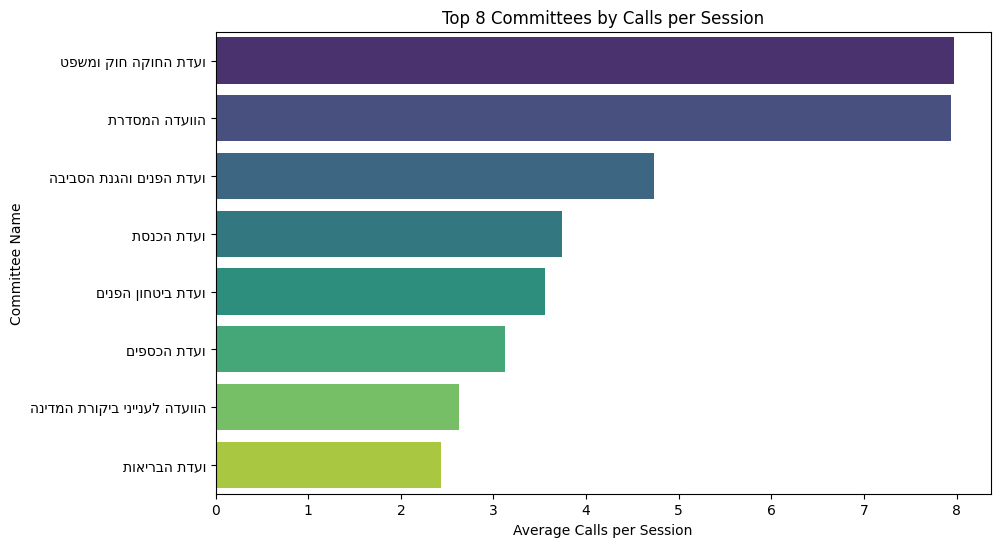

In [17]:
# plot top 8 committees with bar plot, exclude 3rd (idx=2). use color palette
plt.figure(figsize=(10, 6))
# bars vertically

sns.barplot(data=committee_counts.iloc[:8], x='calls_per_session', y='committee_name', palette='viridis')
plt.title('Top 8 Committees by Calls per Session')
plt.xlabel('Average Calls per Session')
plt.ylabel('Committee Name')
plt.show()

In [52]:
# do the same for chairperson now
chairperson_counts = df.groupby('chairperson').agg({'session_id': 'nunique', 'call_to_order': 'sum', 'committee_name': 'nunique'}).reset_index()
chairperson_counts['calls_per_session'] = chairperson_counts.apply(lambda row: row['call_to_order'] / row['session_id'], axis=1)
chairperson_counts.sort_values('calls_per_session', ascending=False, inplace=True)
chairperson_counts = chairperson_counts[chairperson_counts['session_id'] > 5]
# reverse
chairperson_counts['chairperson'] = chairperson_counts['chairperson'].apply(lambda name: name[::-1])
chairperson_counts.head(10)

,chairperson,session_id,call_to_order,committee_name,calls_per_session
36,גרובזניג ןתיא,11,321,7,29.181818
182,ןמטור החמש,61,1035,2,16.967213
100,סורדניפ קחצי,6,83,2,13.833333
7,ןרוקנסינ יבא,14,146,4,10.428571
84,שיק באוי,25,228,6,9.120000
61,םלסמא דוד,26,171,2,6.576923
101,ןיול בירי,10,63,1,6.300000
71,ןיקלא באז,10,61,2,6.100000
149,ןמליס תידיע,13,71,4,5.461538
69,אהאט דילוו,11,56,1,5.090909


In [53]:
chairperson_committee_counts = df.groupby(['chairperson', 'committee_name']).agg({'session_id': 'nunique', 'call_to_order': 'sum'}).reset_index()
chairperson_committee_counts['calls_per_session'] = chairperson_committee_counts.apply(lambda row: row['call_to_order'] / row['session_id'], axis=1)
chairperson_committee_counts.sort_values('calls_per_session', ascending=False, inplace=True)
chairperson_committee_counts = chairperson_committee_counts[chairperson_committee_counts['session_id'] > 5]
# # reverse
chairperson_committee_counts['chairperson'] = chairperson_committee_counts['chairperson'].apply(lambda name: name[::-1])
chairperson_committee_counts.head(10)

,chairperson,committee_name,session_id,call_to_order,calls_per_session
332,ןמטור החמש,ועדת החוקה חוק ומשפט,60,1031,17.183333
143,שיק באוי,ועדת הפנים והגנת הסביבה,6,72,12.000000
142,שיק באוי,ועדת הכנסת,13,128,9.846154
100,םלסמא דוד,ועדת הפנים והגנת הסביבה,25,166,6.640000
178,ןיול בירי,ועדת הכנסת,10,63,6.300000
117,ןיקלא באז,ועדת הכנסת,8,50,6.250000
104,ןטיב דוד,ועדת הכנסת,11,59,5.363636
114,אהאט דילוו,ועדת הפנים והגנת הסביבה,11,56,5.090909
268,ואדנל יזוע,הוועדה לענייני ביקורת המדינה,14,61,4.357143
234,ינפג השמ,ועדת הכספים,55,231,4.200000


In [ ]:
names = chairperson_counts.iloc[:8]['chairperson'].values.tolist()
names_reverse = [name[::-1] for name in names]
names += names_reverse
names

/tmp/ipykernel_31129/4140391291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chairperson_counts.iloc[:8], x='calls_per_session', y='chairperson', palette='viridis')


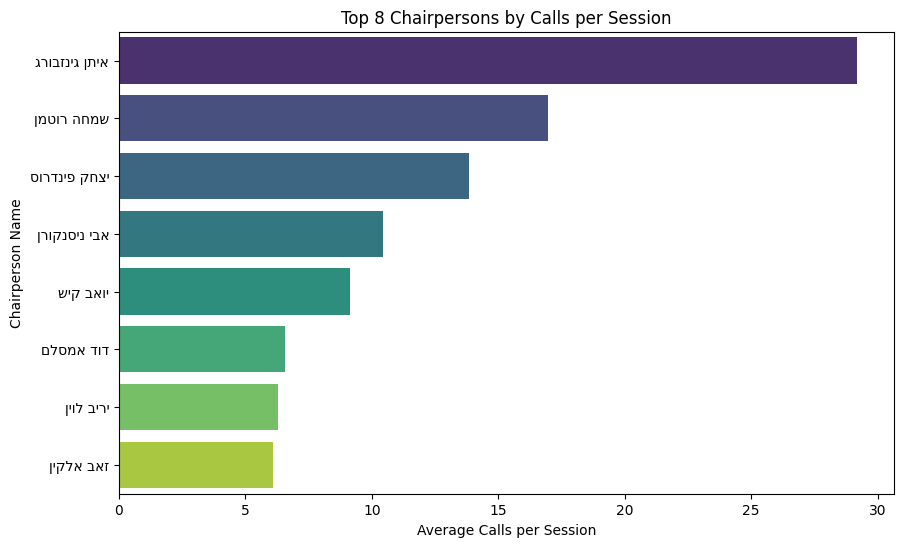

In [75]:
plt.figure(figsize=(10, 6))
names = chairperson_counts['chairperson'].values
sns.barplot(data=chairperson_counts.iloc[:8], x='calls_per_session', y='chairperson', palette='viridis')
plt.title('Top 8 Chairpersons by Calls per Session')
plt.xlabel('Average Calls per Session')
plt.ylabel('Chairperson Name')
plt.show()

In [129]:
# Pivot the DataFrame to prepare for plotting
curr_df = df_filter
pivot_df = curr_df.pivot(index='chairperson', columns='committee_name', values='calls_per_session')

# Plotting
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Chairperson')
plt.ylabel('Calls per Session')
plt.title('Calls per Session by Chairperson and Committee')
plt.xticks(rotation=45)
plt.legend(title='Committee')
plt.tight_layout()
plt.show()

KeyError: 'chairperson'

In [60]:
curr_df

,chairperson,committee_name,session_id,call_to_order,calls_per_session
332,ןמטור החמש,ועדת החוקה חוק ומשפט,60,1031,17.183333
143,שיק באוי,ועדת הפנים והגנת הסביבה,6,72,12.000000
142,שיק באוי,ועדת הכנסת,13,128,9.846154
100,םלסמא דוד,ועדת הפנים והגנת הסביבה,25,166,6.640000
178,ןיול בירי,ועדת הכנסת,10,63,6.300000
117,ןיקלא באז,ועדת הכנסת,8,50,6.250000


In [45]:
names

array(['גרובזניג ןתיאאיתן גינזבורג', 'ןמטור החמששמחה רוטמן',
       'סורדניפ קחצייצחק פינדרוס', 'ןרוקנסינ יבאאבי ניסנקורן',
       'שיק באוייואב קיש', 'םלסמא דודדוד אמסלם', 'ןיול בירייריב לוין',
       'ןיקלא באזזאב אלקין'], dtype=object)